# Heart Disease Prediction

## Importing Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
print(os.listdir())
import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'Heart prediction.ipynb', 'heartdisease.csv', 'Heart_disease_prediction.ipynb']


In [3]:
heart_df=pd.read_csv("heartdisease.csv")
heart_df

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,28.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,23.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


### Data Exploring & Preprocessing

In [3]:
heart_df.head()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0


In [4]:
heart_df.tail()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
253675,0.0,1.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,28.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,23.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,25.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [5]:
heart_df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,28.382364,0.443169,0.296921,0.756544,0.634256,0.811420,0.056197,3.184772,4.242081,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,6.608694,0.496761,0.698160,0.429169,0.481639,0.391175,0.230302,7.412847,8.717951,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,31.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
heart_df.shape

(253680, 16)

In [6]:
type(heart_df)

pandas.core.frame.DataFrame

In [7]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Diabetes              253680 non-null  float64
 6   PhysActivity          253680 non-null  float64
 7   Fruits                253680 non-null  float64
 8   Veggies               253680 non-null  float64
 9   HvyAlcoholConsump     253680 non-null  float64
 10  MentHlth              253680 non-null  float64
 11  PhysHlth              253680 non-null  float64
 12  Sex                   253680 non-null  float64
 13  Age                   253680 non-null  float64
 14  Education             253680 non-null  float64
 15  

In [10]:
print(heart_df.columns)


Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'BMI', 'Smoker',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')


#### Checking correlation betwen columns

In [10]:
heart_df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
MentHlth                0
PhysHlth                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [11]:
# no null values

In [9]:
print(heart_df.corr()["HeartDiseaseorAttack"].abs().sort_values(ascending=False))

HeartDiseaseorAttack    1.000000
Age                     0.221618
HighBP                  0.209361
PhysHlth                0.181698
HighChol                0.180765
Diabetes                0.180272
Income                  0.141011
Smoker                  0.114441
Education               0.099600
PhysActivity            0.087299
Sex                     0.086096
MentHlth                0.064621
BMI                     0.052904
Veggies                 0.039167
HvyAlcoholConsump       0.028991
Fruits                  0.019790
Name: HeartDiseaseorAttack, dtype: float64


In [14]:
heart_df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'BMI', 'Smoker',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [15]:
heart_df.duplicated().sum()

np.int64(42852)

In [16]:
heart_df.drop_duplicates(inplace=True)
print('Number of rows are :',heart_df.shape[0], ',and number of columns are :',heart_df.shape[1])

Number of rows are : 210828 ,and number of columns are : 16


In [6]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Diabetes,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0
Veggies,253680.0,0.811420,0.391175,0.0,1.0,1.0,1.0,1.0
HvyAlcoholConsump,253680.0,0.056197,0.230302,0.0,0.0,0.0,0.0,1.0


### Statistical Analysis

In [4]:
# Assuming heart_df is the dataframe
categorical_columns = [
    "Sex", "Education", "Income", "HighBP", "HighChol", "Smoker",
    "Diabetes", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump"
]

continuous_columns = [
    "BMI", "Age", "MentHlth", "PhysHlth", "HeartDiseaseorAttack"
]

print("Categorical Columns:", categorical_columns)
print("Continuous Columns:", continuous_columns)


Categorical Columns: ['Sex', 'Education', 'Income', 'HighBP', 'HighChol', 'Smoker', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']
Continuous Columns: ['BMI', 'Age', 'MentHlth', 'PhysHlth', 'HeartDiseaseorAttack']


In [ ]:
heart_df[continuous_columns].describe().transpose()

### EDA

In [8]:
print(heart_df.head())
print(heart_df.info())


   HeartDiseaseorAttack  HighBP  HighChol   BMI  Smoker  Diabetes  \
0                   0.0     1.0       1.0  40.0     1.0       0.0   
1                   0.0     0.0       0.0  25.0     1.0       0.0   
2                   0.0     1.0       1.0  28.0     0.0       0.0   
3                   0.0     1.0       0.0  27.0     0.0       0.0   
4                   0.0     1.0       1.0  24.0     0.0       0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  MentHlth  PhysHlth  Sex  \
0           0.0     0.0      1.0                0.0      18.0      15.0  0.0   
1           1.0     0.0      0.0                0.0       0.0       0.0  0.0   
2           0.0     1.0      0.0                0.0      30.0      30.0  0.0   
3           1.0     1.0      1.0                0.0       0.0       0.0  0.0   
4           1.0     1.0      1.0                0.0       3.0       0.0  0.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        6.0     1.0  
2   9.0        4.

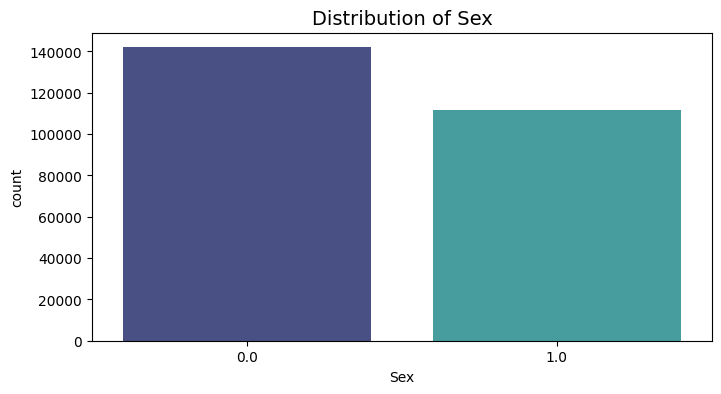

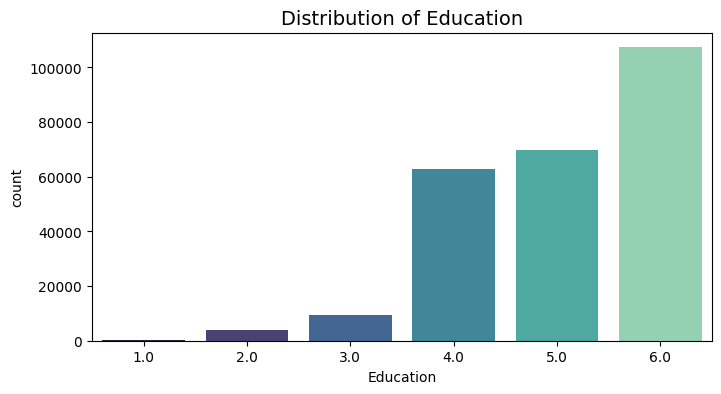

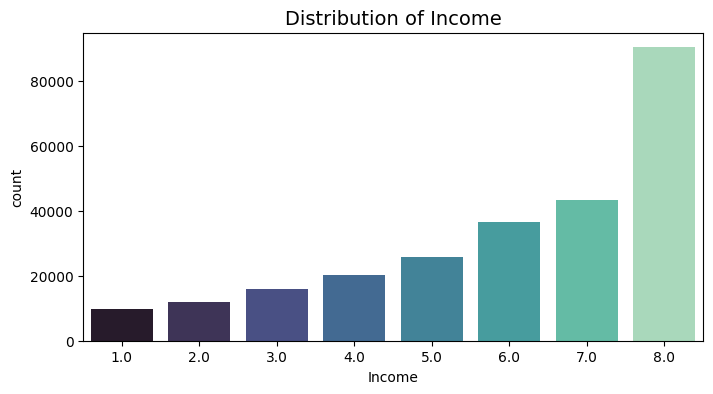

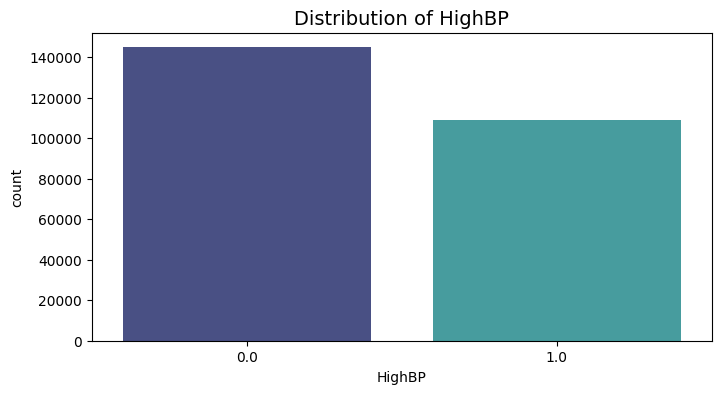

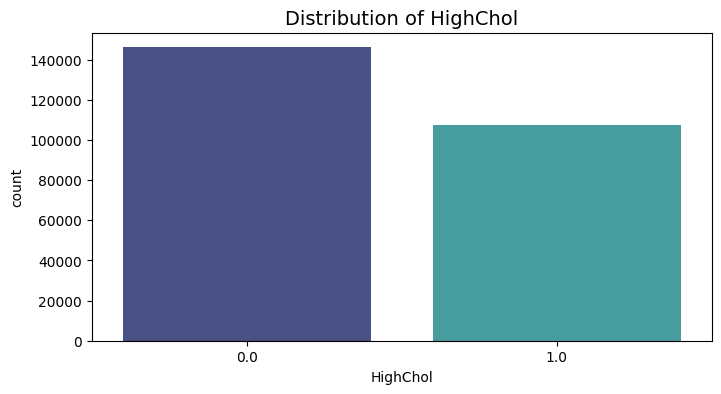

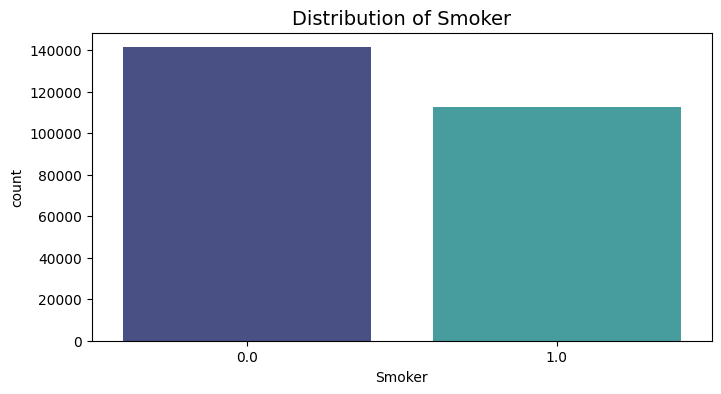

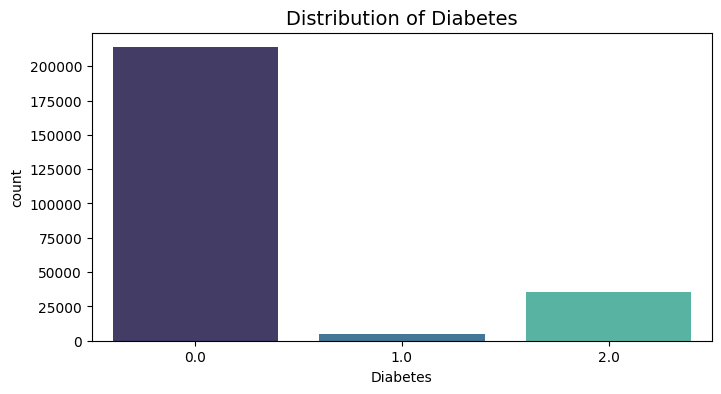

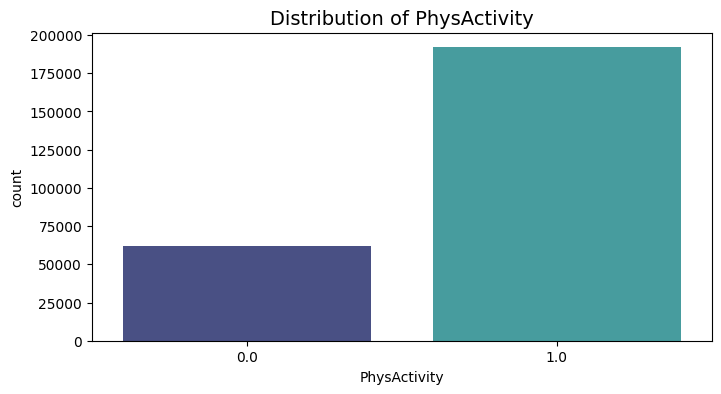

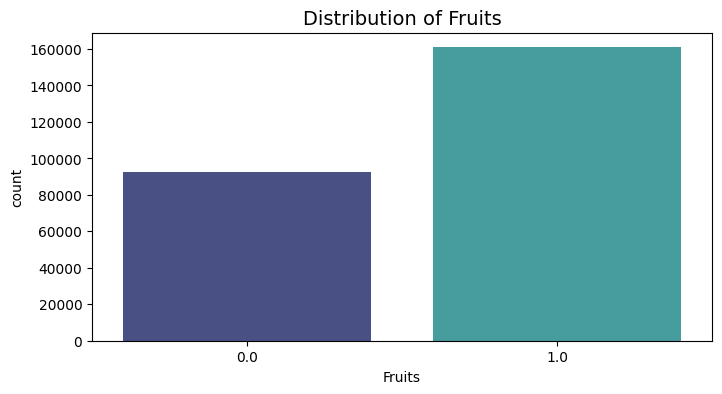

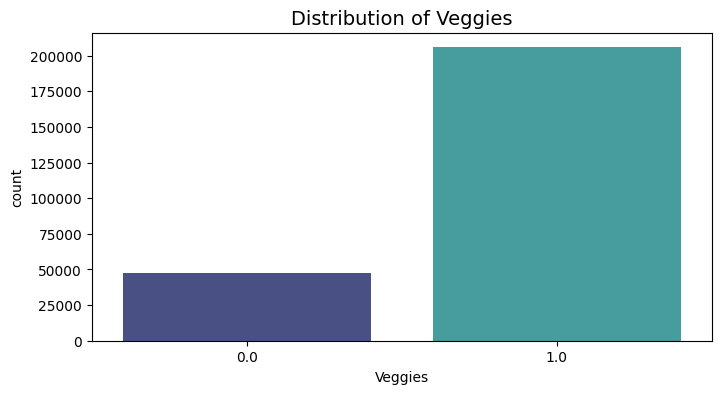

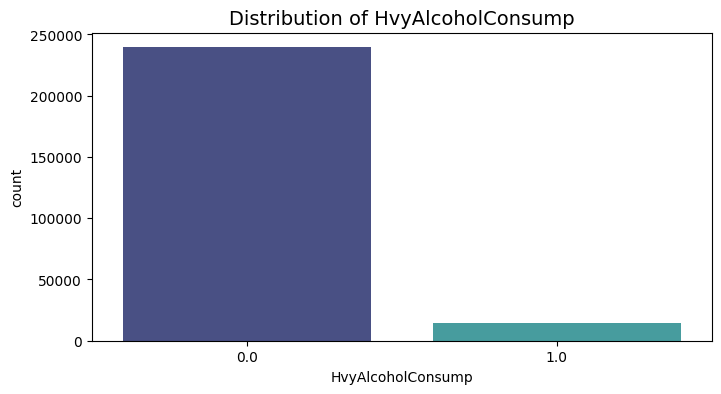

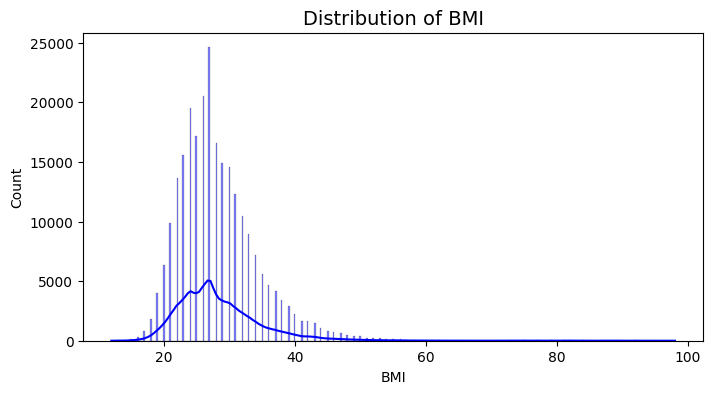

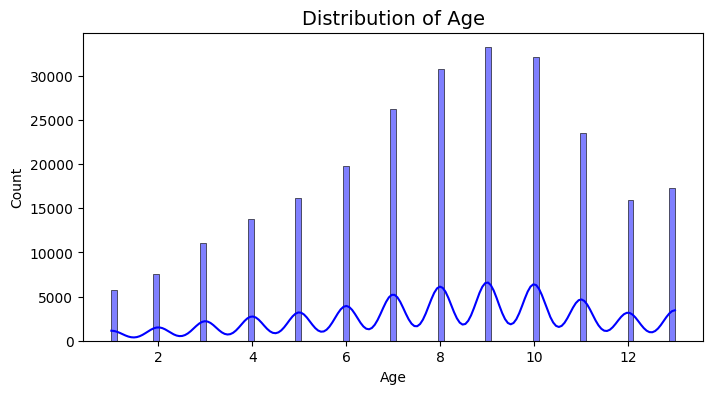

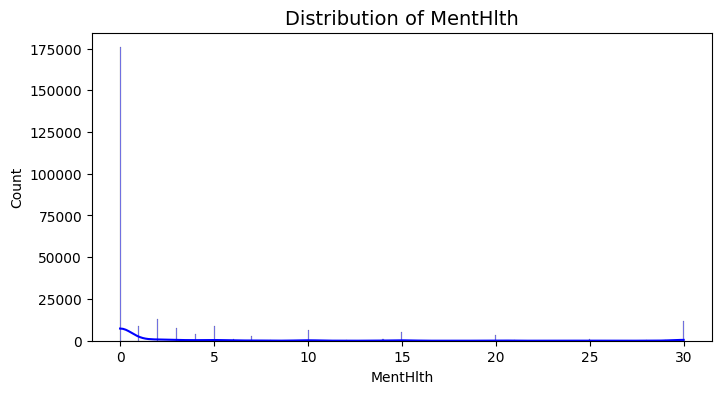

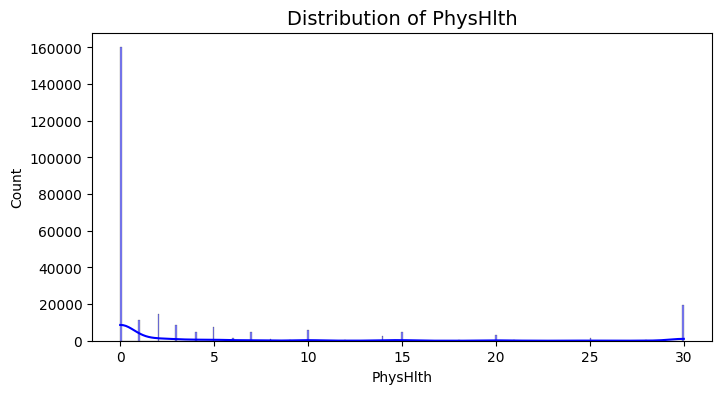

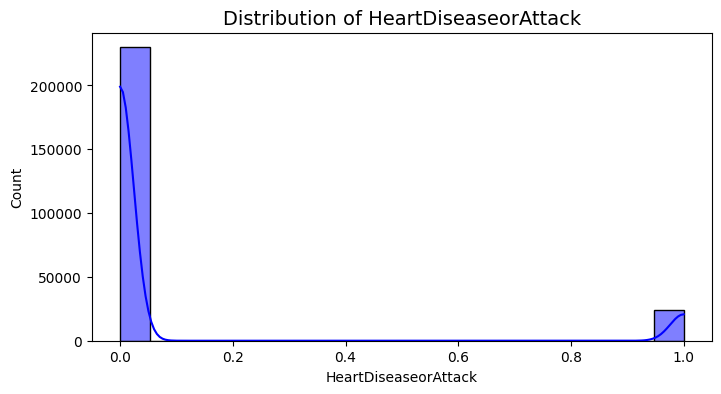

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=heart_df, x=col, palette="mako")  # Use palette="mako"
    plt.title(f'Distribution of {col}', fontsize=14, color='black')
    plt.show()

# Univariate analysis for continuous columns
for col in continuous_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(heart_df[col], kde=True, color="blue")  # Blue bars with KDE
    plt.title(f'Distribution of {col}', fontsize=14, color='black')
    plt.show()


##### Correlation heatmap for continuous columns

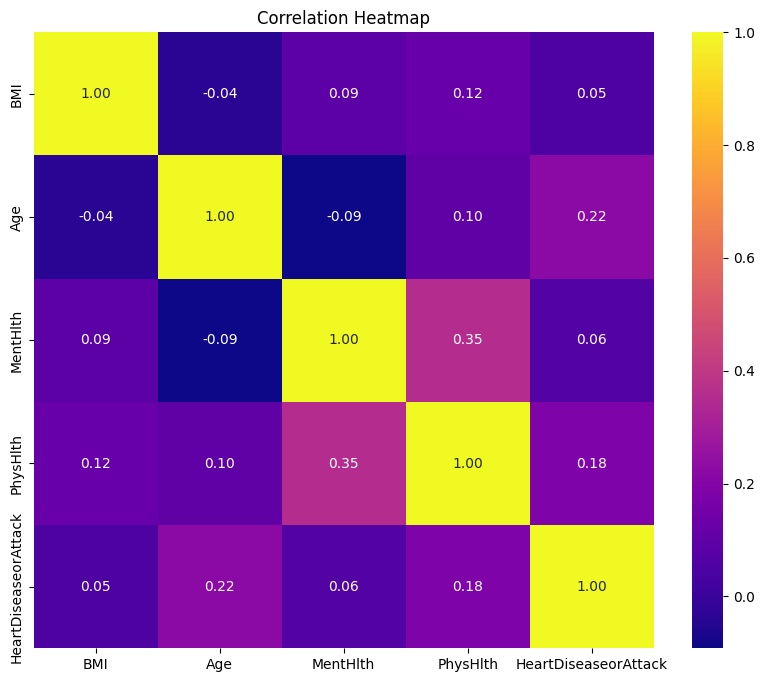

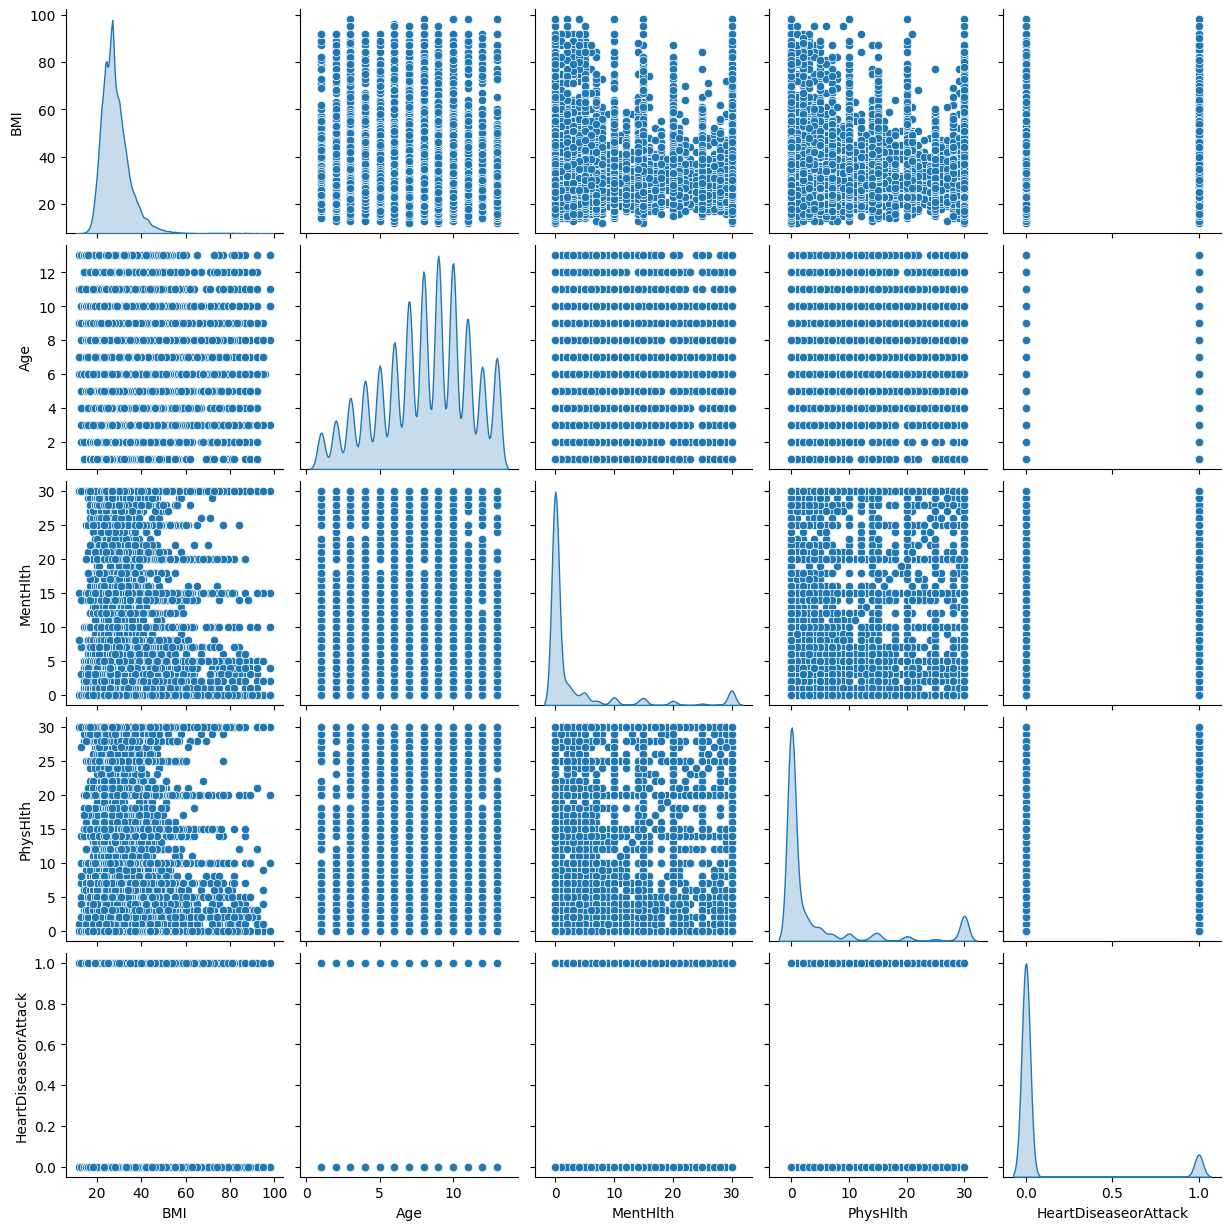

In [8]:

plt.figure(figsize=(10, 8))
sns.heatmap(heart_df[continuous_columns].corr(), annot=True, cmap='plasma', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for relationships
sns.pairplot(heart_df[continuous_columns], diag_kind='kde')
plt.show()

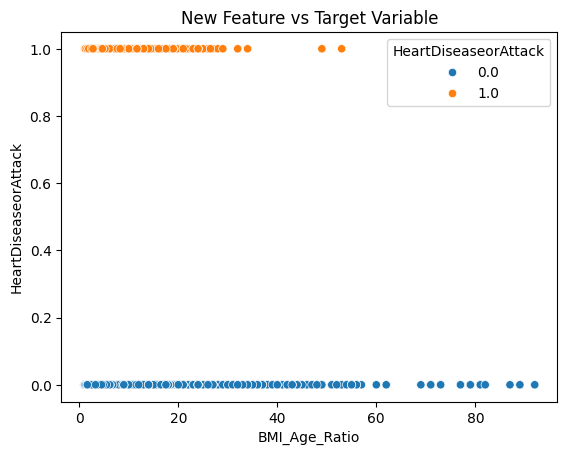

In [7]:
heart_df['BMI_Age_Ratio'] = heart_df['BMI'] / heart_df['Age']

# Check if the new feature is informative
sns.scatterplot(data=heart_df, x='BMI_Age_Ratio', y='HeartDiseaseorAttack', hue='HeartDiseaseorAttack')
plt.title("New Feature vs Target Variable")
plt.show()


### Model Training

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Generate example data (replace this with your actual data)
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)  # Train the model
    predictions = model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, predictions)  # Evaluate accuracy
    print(f"Accuracy for {name}: {accuracy:.2f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, predictions)}")




Training Logistic Regression...
Accuracy for Logistic Regression: 0.83
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        89
           1       0.87      0.82      0.84       111

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200


Training Random Forest...
Accuracy for Random Forest: 0.90
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        89
           1       0.94      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200


Training Support Vector Machine...
Accuracy for Support Vector Machine: 0.83
Classification Report for Support Vector Machine

In [5]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target
X = heart_df.drop("HeartDiseaseorAttack", axis=1)
y = heart_df["HeartDiseaseorAttack"]

# Oversampling with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check distribution
print("Original target distribution:", y.value_counts())
print("Resampled target distribution:", y_resampled.value_counts())


Original target distribution: HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64
Resampled target distribution: HeartDiseaseorAttack
0.0    229787
1.0    229787
Name: count, dtype: int64


#### Precision Recall Curve

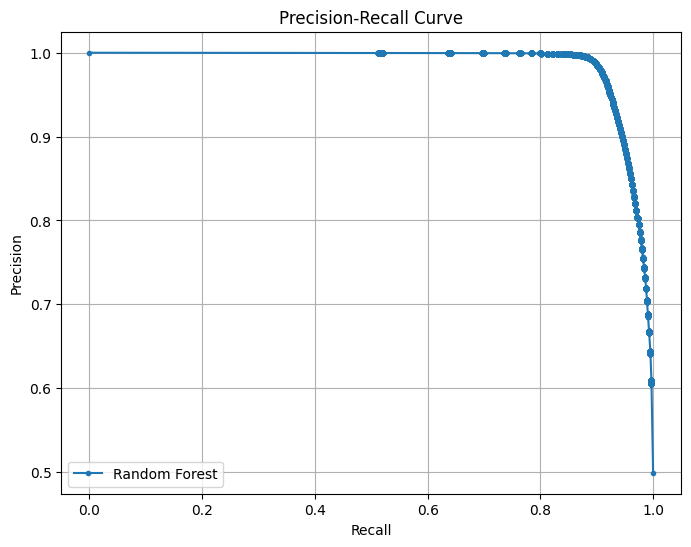

Best Threshold: 0.56
Best F1 Score: 0.94


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

# Example data (replace X_resampled and y_resampled with your actual data)
# X_resampled = ...
# y_resampled = ...

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# Determine the best threshold using the F1-score
fscore = 2 * (precision * recall) / (precision + recall)
best_threshold_index = np.argmax(fscore)
best_threshold = thresholds[best_threshold_index]

print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1 Score: {fscore[best_threshold_index]:.2f}")



In [37]:
from imblearn.over_sampling import SMOTE

if 'heart_df' in locals():
    X = heart_df[categorical_columns + continuous_columns].drop(columns='HeartDiseaseorAttack', axis=1)
    y = heart_df['HeartDiseaseorAttack']

    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    print("Class distribution before SMOTE:")
    print(y.value_counts())
    print("\nClass distribution after SMOTE:")
    print(pd.Series(y_resampled).value_counts())
else:
    print("Error: 'heart_df' is not defined.")

Class distribution before SMOTE:
HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

Class distribution after SMOTE:
HeartDiseaseorAttack
0.0    229787
1.0    229787
Name: count, dtype: int64


Top Features Driving Heart Disease:
         Feature  Importance
0         HighBP    0.140355
12           Age    0.139711
1       HighChol    0.133462
3         Smoker    0.089718
2            BMI    0.082439
11           Sex    0.078989
14        Income    0.069146
13     Education    0.051355
10      PhysHlth    0.043381
5   PhysActivity    0.043051


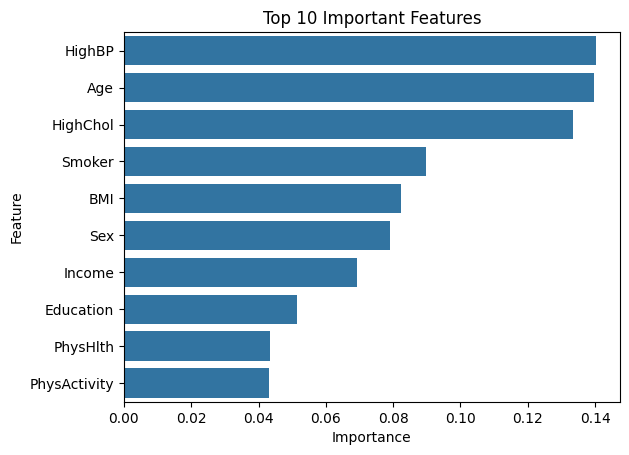

In [10]:
# Feature importance from Random Forest
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top Features Driving Heart Disease:")
print(feature_importance_df.head(10))

# Plot top features
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Important Features")
plt.show()


In [16]:
heart_df.columns


Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'BMI', 'Smoker',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Ensure these column lists match your dataset
categorical_columns = [
    "HighBP", "HighChol", "Smoker", "Diabetes", "PhysActivity",
    "Fruits", "Veggies", "HvyAlcoholConsump", "Sex", "Education", "Income"
]

continuous_columns = ["BMI", "Age", "MentHlth", "PhysHlth"]

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessor for categorical and continuous columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Pipeline for Random Forest
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Evaluate on test set
y_test_pred = pipeline.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     45968
         1.0       0.32      0.09      0.14      4768

    accuracy                           0.90     50736
   macro avg       0.61      0.54      0.54     50736
weighted avg       0.86      0.90      0.87     50736



### Conclusion

In [ ]:
Therefore, from the performance metrics given above, Random Forest Classifier is the best for the prediction of heart disease or attack.
